In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
oldway = pd.read_table("data/_Mattsen_Study3_2021_Dec_05_2356.log", header=None)
newway = pd.read_table('data/after_Mattsen_Study3_2021_Dec_06_2154.log', header=None)

In [37]:
snds = oldway[oldway[2].str.startswith("Played")]
ports = oldway[oldway[2].str.startswith("Sent")]
nsnds = newway[newway[2].str.startswith('Played')]
nports = newway[newway[2].str.startswith("Sent")]

In [74]:
old_diffs = snds[0].diff()
new_diffs = nsnds[0].diff()
diff_df = (pd
    .DataFrame(pd.concat({'old': old_diffs[1:], 'new': new_diffs[1:]}))
    .reset_index()
    .drop('level_1', axis=1)
    .rename(columns={'level_0': 'version', 0: 'SndToSnd'}))
diff_df

,version,SndToSnd
0,old,0.5041
1,old,0.5090
2,old,0.5104
3,old,0.5080
4,old,0.5070
...,...,...
1398,new,0.5000
1399,new,0.5000
1400,new,0.5000
1401,new,0.5000


In [75]:
evt_times = pd.concat([snds.reset_index(drop=True), ports.reset_index(drop=True)], axis=1)[0]
evt_times.columns = ['SoundTime', 'PortTime']
nevt_times = pd.concat([nsnds.reset_index(drop=True), nports.reset_index(drop=True)], axis=1)[0]
nevt_times.columns = ['SoundTime', 'PortTime']

In [76]:
evt_times['TimeDiff'] = evt_times.SoundTime - evt_times.PortTime
evt_times = evt_times.reset_index()
nevt_times['TimeDiff'] = nevt_times.SoundTime - nevt_times.PortTime
nevt_times = nevt_times.reset_index()

<AxesSubplot:xlabel='index', ylabel='TimeDiff'>

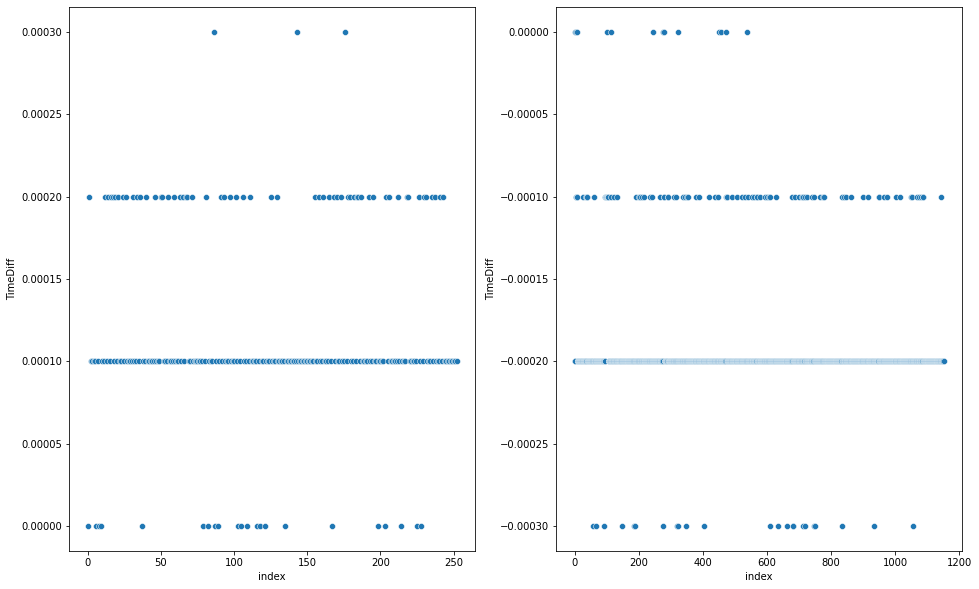

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,10))
sns.scatterplot(data=evt_times, ax=ax1, x='index', y='TimeDiff')
sns.scatterplot(data=nevt_times, ax=ax2, x='index', y='TimeDiff')

<AxesSubplot:xlabel='TimeDiff', ylabel='Count'>

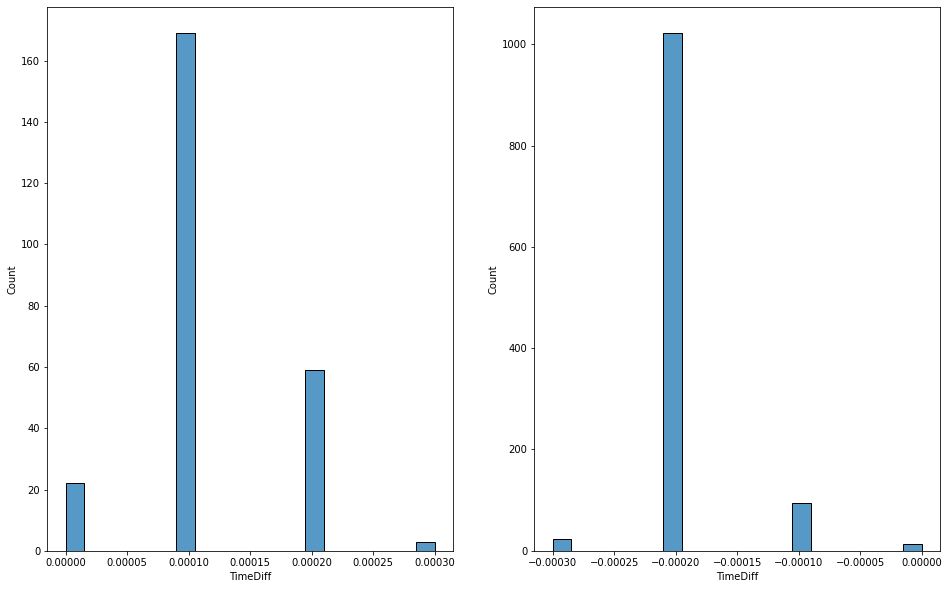

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,10))
sns.histplot(data=evt_times, ax=ax1, x='TimeDiff', bins=20)
sns.histplot(data=nevt_times, ax=ax2, x='TimeDiff', bins=20)

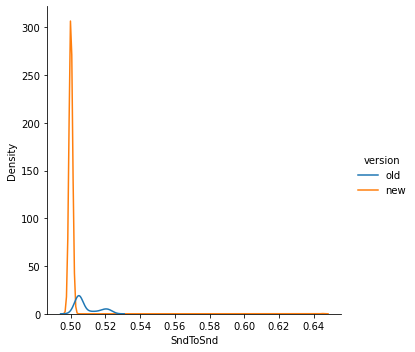

In [80]:
sns.displot(data=diff_df, kind='kde', x='SndToSnd', hue='version')